                                   Makine Öğrenmesi ile zihinsel bozukluk tespiti 

                                   Gerekli kütüphanerin import edilmesi
                                   

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
#verisetinin yüklenmesi/upgrading of data
df=pd.read_csv('Dataset-Mental-Disorders.CSV')

In [3]:
print(df.head(3))#veriseti hakkında fikir sahibi olmak icin ilk 3 veriyi goruntuleme/viewing the first 3 data to get an idea about the data
print(df.info()) #veriseti hakkında bilgileri öğrenme/learning information about the data network

  Patient Number    Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01    Usually      Seldom  Sometimes       Sometimes        YES   
1     Patiant-02    Usually      Seldom    Usually       Sometimes         NO   
2     Patiant-03  Sometimes  Most-Often  Sometimes       Sometimes        YES   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO                YES            YES   
1                  NO               NO                 NO             NO   
2                 YES               NO                YES            YES   

  Overthinking Sexual Activity Concentration  Optimisim Expert Diagnose  
0          YES       3 From 10     

In [4]:
for i in df.columns:                #benzersiz verileri goruntuleme/viewing unique data
    print(f"{i}: {df[i].unique()}")

Patient Number: ['Patiant-01' 'Patiant-02' 'Patiant-03' 'Patiant-04' 'Patiant-05'
 'Patiant-06' 'Patiant-07' 'Patiant-08' 'Patiant-09' 'Patiant-10'
 'Patiant-11' 'Patiant-12' 'Patiant-13' 'Patiant-14' 'Patiant-15'
 'Patiant-16' 'Patiant-17' 'Patiant-18' 'Patiant-19' 'Patiant-20'
 'Patiant-21' 'Patiant-22' 'Patiant-23' 'Patiant-24' 'Patiant-25'
 'Patiant-26' 'Patiant-27' 'Patiant-28' 'Patiant-29' 'Patiant-30'
 'Patiant-31' 'Patiant-32' 'Patiant-33' 'Patiant-34' 'Patiant-35'
 'Patiant-36' 'Patiant-37' 'Patiant-38' 'Patiant-39' 'Patiant-40'
 'Patiant-41' 'Patiant-42' 'Patiant-43' 'Patiant-44' 'Patiant-45'
 'Patiant-46' 'Patiant-47' 'Patiant-48' 'Patiant-49' 'Patiant-50'
 'Patiant-51' 'Patiant-52' 'Patiant-53' 'Patiant-54' 'Patiant-55'
 'Patiant-56' 'Patiant-57' 'Patiant-58' 'Patiant-59' 'Patiant-60'
 'Patiant-61' 'Patiant-62' 'Patiant-63' 'Patiant-64' 'Patiant-65'
 'Patiant-66' 'Patiant-67' 'Patiant-68' 'Patiant-69' 'Patiant-70'
 'Patiant-71' 'Patiant-72' 'Patiant-73' 'Patiant-74' 'Patian

In [5]:
y=df["Expert Diagnose"]     #çıktıları olusturma/creating outputs
x=df.drop(["Patient Number","Expert Diagnose"],axis=1) #patient stununun attım /i threw the patient stunner

                                VERİLERİ İŞLEME / DATA PROCESSING

In [7]:
#Usually Sometimes Seldom ve Most-often değerlerini numerik değere cevirme
#Usually Sometimes convert the values of Sale and Most-often to a numerical value
x.iloc[: , x.columns.get_loc("Sadness"):x.columns.get_loc("Sleep dissorder")+1]=x.iloc[:,x.columns.get_loc("Sadness"):x.columns.get_loc("Sleep dissorder")+1].replace("Usually",4)

x.iloc[: , x.columns.get_loc("Sadness"):x.columns.get_loc("Sleep dissorder")+1]=x.iloc[:,x.columns.get_loc("Sadness"):x.columns.get_loc("Sleep dissorder")+1].replace("Sometimes",3)

x.iloc[: , x.columns.get_loc("Sadness"):x.columns.get_loc("Sleep dissorder")+1]=x.iloc[:,x.columns.get_loc("Sadness"):x.columns.get_loc("Sleep dissorder")+1].replace("Seldom",2)

x.iloc[: , x.columns.get_loc("Sadness"):x.columns.get_loc("Sleep dissorder")+1]=x.iloc[:,x.columns.get_loc("Sadness"):x.columns.get_loc("Sleep dissorder")+1].replace("Most-Often",1)

In [8]:
#diğer 4. index ile 13. index arası yes ve no lardan olusuyor o değerleri de 0 ve 1 ile değiştirelim
#the other 4. 13 with the index. the index consists of yes and no Dec, let's replace those values with 0 and 1

x.iloc[: , x.columns.get_loc("Mood Swing"):x.columns.get_loc("Overthinking")+1]=x.iloc[:,x.columns.get_loc("Mood Swing"):x.columns.get_loc("Overthinking")+1].replace("YES",1)
x.iloc[: , x.columns.get_loc("Mood Swing"):x.columns.get_loc("Overthinking")+1]=x.iloc[:,x.columns.get_loc("Mood Swing"):x.columns.get_loc("Overthinking")+1].replace("NO",0)

In [9]:
x["Suicidal thoughts"].replace('YES ',1,inplace=True) 

In [10]:
#1-10,2-10,.....,9-10 arasındaki değerleri 1 ile 9 arasındaki değerlere cevirme
#1-10,2-10,.....,Dec Decode values between 9-10 to values between 1 and 9
x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("1 From 10",1)

x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("2 From 10",2)

x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("3 From 10",3)
x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("4 From 10",4)
x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("5 From 10",5)
x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("6 From 10",6)

x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("7 From 10",7)

x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("8 From 10",8)

x.iloc[: , x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1]=x.iloc[:,x.columns.get_loc("Sexual Activity"):x.columns.get_loc("Optimisim")+1].replace("9 From 10",9)

In [11]:
x.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,4,2,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4
1,4,2,4,3,0,1,0,0,0,0,0,0,0,0,4,2,5
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,6,5,7
3,4,2,4,1,1,1,1,0,1,0,0,0,0,0,3,2,2
4,4,4,3,3,0,0,0,0,0,0,0,1,1,1,5,5,6


In [12]:
   #çıktı verilerini sayısal değerlere cevirme /converting output data to numerical values
y.replace("Normal", 1, inplace=True)
y.replace("Depression", 2, inplace=True)
y.replace("Bipolar Type-1", 3, inplace=True)
y.replace("Bipolar Type-2", 4, inplace=True)

In [17]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
import matplotlib.pyplot as plt

In [18]:
# MinMaxScaler kullanarak veriyi normalize etme / Normalizing data using MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

In [19]:
#PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_normalized)

In [20]:
#LDA
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(x_normalized, y)

In [21]:
# PCA için özniteliklerin önemi / The importance of attributes for PCA
pca_components = pd.DataFrame(pca.components_, columns=x.columns)
print("PCA Components:")
print(pca_components)

PCA Components:
    Sadness  Euphoric  Exhausted  Sleep dissorder  Mood Swing  \
0  0.020747 -0.020059  -0.062153         0.098976    0.465045   
1 -0.229859 -0.092613  -0.118212        -0.153327    0.082051   

   Suicidal thoughts   Anorxia  Authority Respect  Try-Explanation  \
0           0.223997  0.364314          -0.313444         0.252296   
1           0.466530  0.133368           0.171660        -0.044003   

   Aggressive Response  Ignore & Move-On  Nervous Break-down  Admit Mistakes  \
0             0.329196         -0.265698            0.321035       -0.337082   
1            -0.314916          0.440461            0.391304        0.058118   

   Overthinking  Sexual Activity  Concentration  Optimisim  
0      0.019445         0.100071      -0.135375   0.008280  
1      0.326406        -0.157190      -0.074810  -0.202512  


In [22]:
# LDA için özniteliklerin önemi / The importance of attributes for LDA
lda_components = pd.DataFrame(lda.scalings_, columns=[f'LDA_{i+1}' for i in range(lda.scalings_.shape[1])], index=x.columns)
print("LDA Components:")
print(lda_components)

LDA Components:
                        LDA_1     LDA_2     LDA_3
Sadness              0.022680  0.301842  0.243543
Euphoric            -0.024785 -0.616218  1.110128
Exhausted            0.086666 -0.358194 -0.134074
Sleep dissorder     -0.330619  0.594803  0.905009
Mood Swing          -5.695661 -0.411350  0.626337
Suicidal thoughts   -0.570479  1.069979 -0.692825
Anorxia             -0.002648 -0.039867  0.092004
Authority Respect   -0.014054 -0.412276  1.162608
Try-Explanation      0.001111 -0.195585  0.455651
Aggressive Response -0.460924 -0.279092 -0.495322
Ignore & Move-On     0.354494  0.122855  0.527603
Nervous Break-down  -0.370219  0.423980 -0.462115
Admit Mistakes      -0.062718  0.169679  0.623966
Overthinking         0.034002  0.496261 -0.930201
Sexual Activity      0.663355 -1.585252 -2.105278
Concentration        0.038378 -0.241895 -0.375210
Optimisim            0.172524 -3.312977 -0.622801


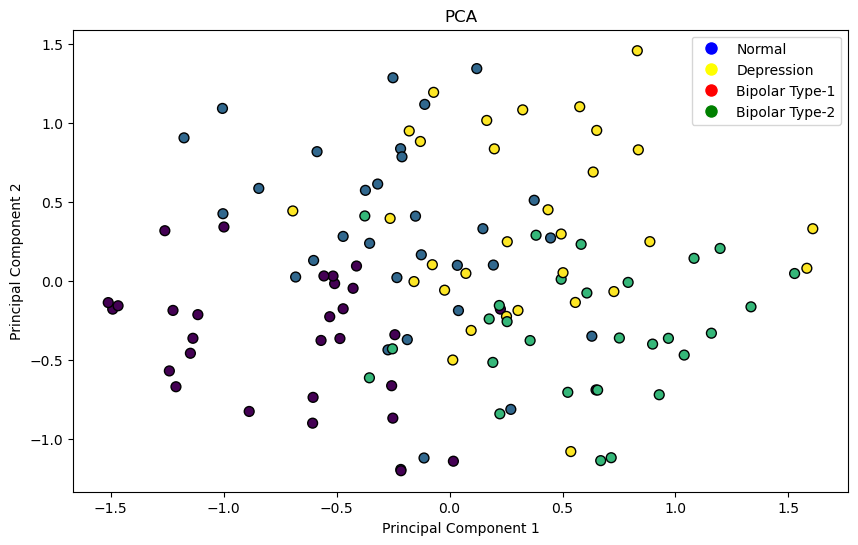

In [27]:
# PCA görseli için renk anlamlarını belirten açıklama ve gorselleştirme / Description and visualization indicating the meanings of colors for the PCA image
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Depression', markerfacecolor='yellow', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Bipolar Type-1', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Bipolar Type-2', markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, loc='upper right')

plt.show()

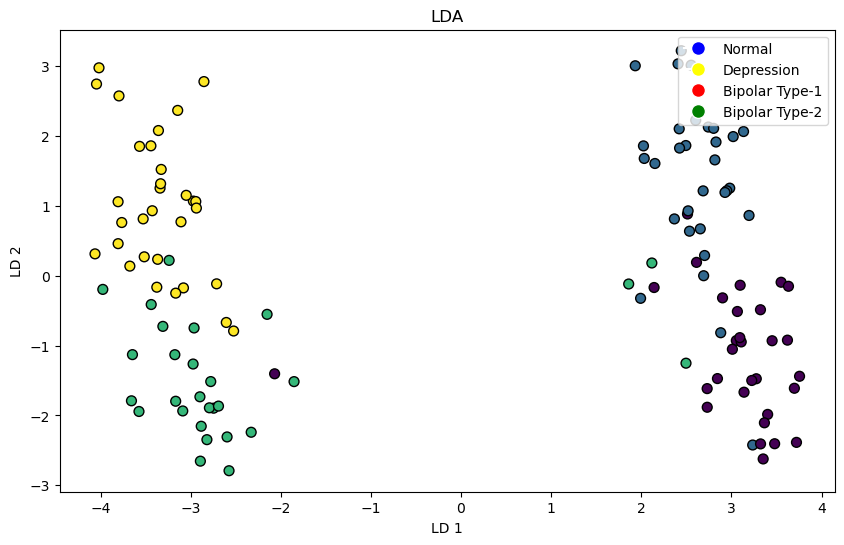

In [28]:
# LDA görseli için renk anlamlarını belirten açıklama ve gorselleştirme/Description and gorselization indicating the meanings of colors for the LDA image
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_lda[:, 0], x_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA')
plt.xlabel('LD 1')
plt.ylabel('LD 2')

# Renk anlamları açıklaması
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Depression', markerfacecolor='yellow', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Bipolar Type-1', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Bipolar Type-2', markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, loc='upper right')

plt.show()

            Verisetini bölme / Splitting your data
            

In [29]:
from sklearn.model_selection import train_test_split
# Veri setini bağımsız değişkenler (X) ve bağımlı değişkenler (y) olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression, LogisticRegression
# Çoklu Doğrusal Regresyon modelini eğitme / Training the Multiple Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Multinomial Logistic Regression modelini eğitme / Training the Multinomial Logistic Regression model
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
logistic_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [35]:
# Çoklu Doğrusal Regresyon katsayıları / Multiple Linear Regression coefficients
linear_reg_coefficients = linear_reg_model.coef_
print("Çoklu Doğrusal Regresyon Katsayıları:")
linear_reg_coefficients

Çoklu Doğrusal Regresyon Katsayıları:


array([ 0.05225479,  0.03499516, -0.01580703,  0.10648228,  1.80044217,
        0.38849814, -0.01436838, -0.20274143, -0.04184928,  0.16501748,
       -0.00654024,  0.20927417,  0.08261813,  0.010699  , -0.09319052,
        0.01221881, -0.09802833])

In [36]:
# Multinomial Logistic Regression katsayıları / Polynomial Logistic Regression coefficients
logistic_reg_coefficients = logistic_reg_model.coef_
print("Multinomial Logistic Regression Katsayıları:")
logistic_reg_coefficients

Multinomial Logistic Regression Katsayıları:


array([[-0.27935969,  0.07281843,  0.12003507, -0.16985886, -1.18165697,
        -1.32038865, -0.52803327,  0.78939273,  0.25060699, -0.83990424,
         0.49179372, -0.97842796,  0.40070949, -0.44564219,  0.27868166,
         0.0486725 ,  0.45411011],
       [ 0.20561283, -0.46373696, -0.01659234,  0.15735154, -1.9839701 ,
         0.75267392,  0.28384492, -0.54159304, -0.19016458, -0.06739688,
         0.25010006,  0.19569174, -0.11572093,  0.53062913, -0.27071887,
         0.28823276, -0.48234856],
       [-0.01444626,  0.58601233,  0.04376028, -0.44620361,  0.99129576,
         0.02089553, -0.15614618, -0.38972752, -0.0226274 ,  0.8662225 ,
        -0.90810168,  0.49466251, -0.60726291, -0.01306799,  0.43387482,
        -0.2903192 ,  0.69200842],
       [ 0.08819312, -0.1950938 , -0.147203  ,  0.45871092,  2.17433131,
         0.5468192 ,  0.40033454,  0.14192783, -0.03781501,  0.04107862,
         0.1662079 ,  0.28807371,  0.32227434, -0.07191895, -0.44183761,
        -0.04658606

                         Karar ağacı eğitim , test ,budama, görselleştirme
                         Decision tree training , testing ,pruning, visualization

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [39]:
# En iyi ağaç derinliğini bulma / Finding the best tree depth
best_depth = None
best_accuracy = 0

#En iyi dogrulugu bulmak icin farklı derinliklerde model egitip tahmin yaparak en iyi dogrulukta agacı budama işlemi
#The process of pruning a tree to the best accuracy by training a model and estimating at different depths to find the best accuracy
for depth in range(1, 20):
    pruned_tree = DecisionTreeClassifier(max_depth=depth)
    pruned_tree.fit(X_train, y_train)
    y_pred = pruned_tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

# En iyi derinlikle budanmış ağacı oluşturma / Creating a pruned tree with the best depth
pruned_tree = DecisionTreeClassifier(max_depth=best_depth)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

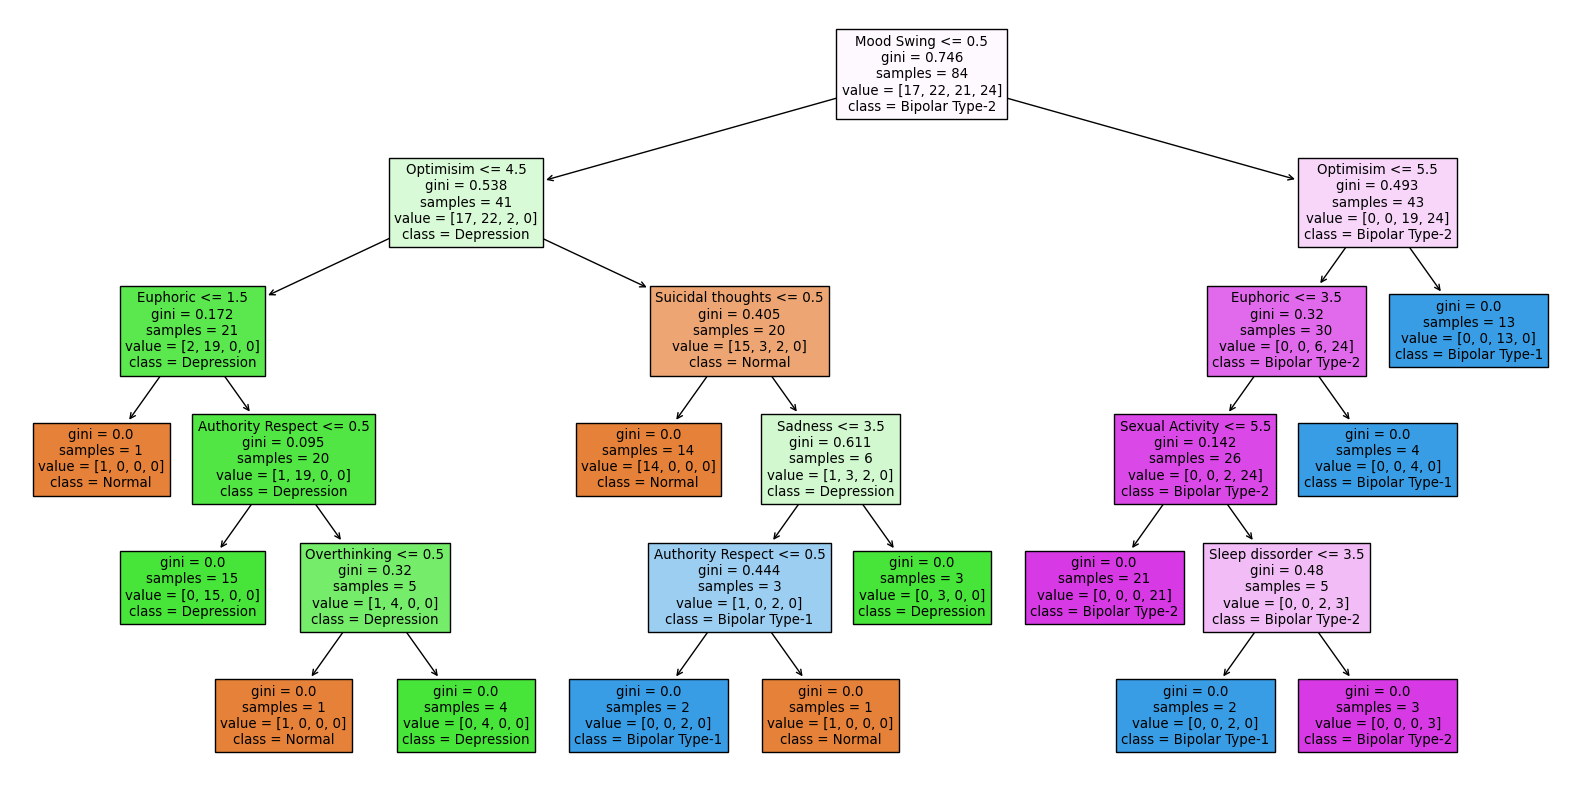

In [40]:
# Budanmış ağaç yapısını görselleştirme / Visualizing the pruned tree structure
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree, feature_names=list(x.columns), class_names=['Normal', 'Depression', 'Bipolar Type-1', 'Bipolar Type-2'], filled=True)
plt.show()

In [41]:
# Test verisi üzerinde tahmin yapma / Making predictions on test data
test_predictions = pruned_tree.predict(X_test)

In [42]:
# Sınıflandırma raporu yazdırma / Printing a classification report
print("Test Verisi Sınıflandırma Raporu:")
classification_report(y_test, test_predictions)

Test Verisi Sınıflandırma Raporu:


'              precision    recall  f1-score   support\n\n           1       0.82      0.69      0.75        13\n           2       0.78      0.78      0.78         9\n           3       0.60      0.86      0.71         7\n           4       1.00      0.86      0.92         7\n\n    accuracy                           0.78        36\n   macro avg       0.80      0.80      0.79        36\nweighted avg       0.80      0.78      0.78        36\n'

In [43]:
#Bayes sınıflandırıcısı/Bayesian Classifier

In [44]:
from sklearn.naive_bayes import GaussianNB


In [45]:
# Naive Bayes sınıflandırıcısını eğitme / How to train a Naive Bayesian classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [46]:
# Eğitim verisi üzerinde tahmin yapma / # Making predictions on training data
train_predictions = naive_bayes_model.predict(X_train)

In [47]:
# Eğitim verisi için sınıflandırma raporu yazdırma
# Printing a classification report for training data
print("Eğitim Verisi Sınıflandırma Raporu:")
print(classification_report(y_train, train_predictions))

Eğitim Verisi Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.92      1.00      0.96        22
           3       1.00      0.38      0.55        21
           4       0.69      1.00      0.81        24

    accuracy                           0.85        84
   macro avg       0.90      0.85      0.83        84
weighted avg       0.89      0.85      0.82        84



In [48]:
# Test verisi üzerinde tahmin yapma / Making predictions on test data
test_predictions = naive_bayes_model.predict(X_test)

In [49]:
# Test verisi için sınıflandırma raporu yazdırma / Printing a classification report for testing data
print("Test Verisi Sınıflandırma Raporu:")
print(classification_report(y_test, test_predictions))

Test Verisi Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.82      0.69      0.75        13
           2       0.73      0.89      0.80         9
           3       1.00      0.29      0.44         7
           4       0.58      1.00      0.74         7

    accuracy                           0.72        36
   macro avg       0.78      0.72      0.68        36
weighted avg       0.79      0.72      0.70        36

